In [36]:
import matplotlib.pyplot as plt
import numpy as np
import csv


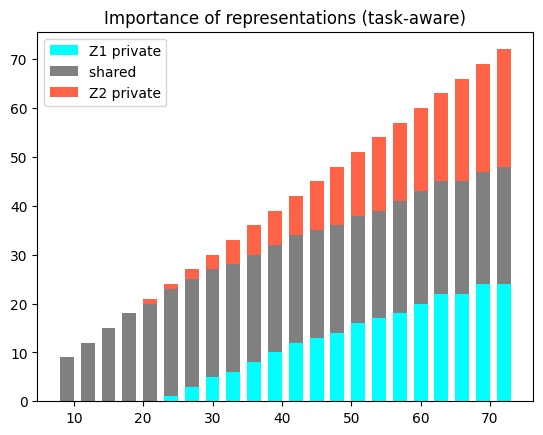

In [37]:
### Settings
z_dim = 96
beta_rec = 0.0 # 98304.0 10000.0
batch_size = 64
beta_kl = 25.0 # 1.0 25.0
vae_model = "ResBasedVAE" # "SVAE" or "CNNBasedVAE"
weight_cross_penalty = 10.0
beta_task = 0.1 # task aware
VAEepoch = 849
dataset = 'airbus' # 'PickAndPlace' or 'gym_fetch'
seed = 2
lr = 1e-4
model_type = "AE"
width = 64
height = 112

### load csv file
### Distributed
mAP = []
z_list = []
rep_dims = [[], [], []]
z_list.append([])
mAP.append([])
file_name = f'{dataset}_{z_dim}_taskaware_{model_type}_{vae_model}{width}x{height}_kl{beta_kl}_rec{beta_rec}_task{beta_task}_bs{batch_size}_cov{weight_cross_penalty}_lr{lr}_seed{seed}'
csv_name = file_name + '.csv'

with open('../csv_data/' + csv_name, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == 'dpca_dim':
            continue
        else:
            z_list[-1].append(int(row[0]))
            mAP[-1].append(float(row[4]))
            rep_dims[0].append(int(row[1]))
            rep_dims[1].append(int(row[2]))
            rep_dims[2].append(int(row[3]))

rep_dims = np.array(rep_dims)

### stacked bar plot
colors = ['blue', 'orange', 'green']
plt.bar(z_list[0], rep_dims[0], width=2, color='cyan', label='Z1 private')
plt.bar(z_list[0], rep_dims[1], width=2, color='grey', label='shared ', bottom=rep_dims[0])
plt.bar(z_list[0], rep_dims[2], width=2, color='tomato', label='Z2 private', bottom=rep_dims[0]+rep_dims[1])
plt.legend(loc="upper left")
plt.title('Importance of representations (task-aware)')
plt.show()


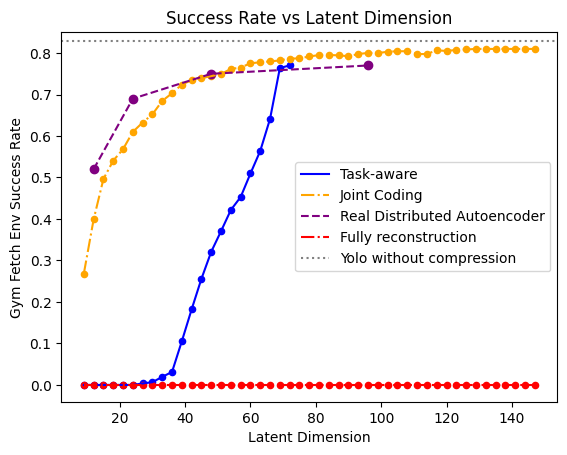

In [39]:
### Joint
z_dim = 147
beta_rec = 0.0
batch_size = 64
beta_kl = 25.0 # 1.0 25.0
vae_model = "JointResBasedVAE"
weight_cross_penalty = 10.0
beta_task = 0.1 # task aware
VAEepoch = 849
seed = 2
lr = 1e-4
model_type = "AE"

rep_dims = [[], [], []]
z_list.append([])
mAP.append([])
file_name = f'{dataset}_{z_dim}_taskaware_{model_type}_{vae_model}{width}x{height}_kl{beta_kl}_rec{beta_rec}_task{beta_task}_bs{batch_size}_cov{weight_cross_penalty}_lr{lr}_seed{seed}'
csv_name = file_name + '.csv'

with open('../csv_data/' + csv_name, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0] == 'dpca_dim':
            continue
        else:
            z_list[-1].append(int(row[0]))
            mAP[-1].append(float(row[4]))
            rep_dims[0].append(int(row[1]))
            rep_dims[1].append(int(row[2]))
            rep_dims[2].append(int(row[3]))

rep_dims = np.array(rep_dims)

label = ['Task-aware', 'Joint Coding']
color_list = ['b', 'orange']
line_style = ['-', '-.']
### plot
for l, z, sr, c, ls in zip(label, z_list, mAP, color_list, line_style):
    plt.plot(z, sr, c=c, label=l, linestyle=ls)
    plt.scatter(z, sr, c=c, s=20)

### real learning model
plt.plot([12, 24, 48, 96], [0.52, 0.69, 0.75, 0.77], c='purple', label='Real Distributed Autoencoder', linestyle='--')
plt.scatter([12, 24, 48, 96], [0.52, 0.69, 0.75, 0.77], c='purple')

plt.plot(np.arange(9, 148, 3), 0 * np.arange(9, 148, 3), c='red', label='Fully reconstruction', linestyle='-.')
plt.scatter(np.arange(9, 148, 3), 0 * np.arange(9, 148, 3), c='red', s=20)
plt.axhline(y = 0.83, color = 'gray', linestyle = ':', label='Yolo without compression')
plt.ylabel("Gym Fetch Env Success Rate")
plt.xlabel("Latent Dimension")
plt.title(f"Success Rate vs Latent Dimension") # \n beta kl={beta_kl}, beta_rec={beta_rec},task weight={task_weight}, beta_cor={weight_cross_penalty}")
plt.legend()
plt.show()